In [27]:
from qiskit import *

In [28]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.2', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### Single Qubit states

In [29]:
from qiskit.quantum_info import Statevector

In [30]:
qc = QuantumCircuit(1)
sv = Statevector.from_label('+')
sv

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [31]:
# Apply the quantum circuit to new sv 
new_sv = sv.evolve(qc)

In [32]:
new_sv

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [33]:
# State fidelity - State fidelity is the measure of how close two quantum states are to each other
from qiskit.quantum_info import state_fidelity

state_fidelity(sv, new_sv)

0.9999999999999996

### CNOT gate - Fully adder circuit

In [25]:
from qiskit.visualization import plot_histogram

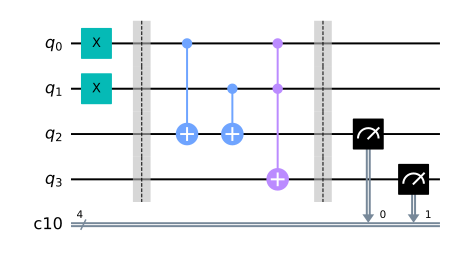

In [60]:
qr = QuantumRegister(4, name="q")
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)
qc.x(1)
qc.x(0)
qc.barrier()

qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)

qc.barrier()
qc.measure(2,0)
qc.measure(3,1)

qc.draw()

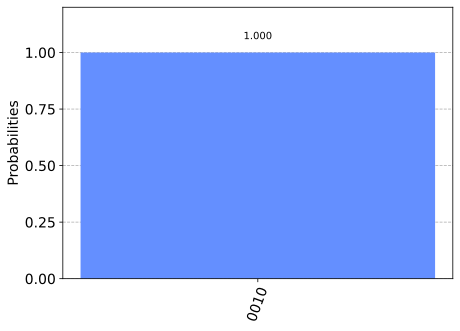

In [61]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, simulator).result().get_counts()
plot_histogram(counts)

### Statevector simulator

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

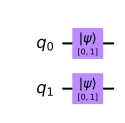

In [10]:
qc = QuantumCircuit(2)
initial_state = [0,1]
qc.initialize(initial_state,0)
qc.initialize(initial_state,1)

qc.draw()

In [11]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()

In [12]:
result.get_statevector()

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


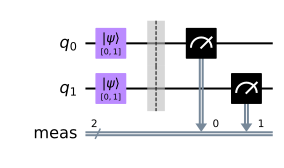

In [13]:
qc.measure_all()
qc.draw()

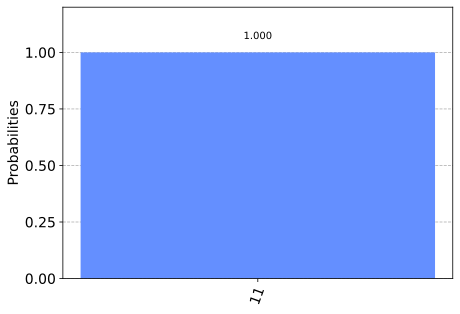

In [14]:
result = execute(qc, backend).result()
count = result.get_counts()
plot_histogram(count)